# Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

> The goals of this notebook exercise are (1) to practice integrating the `deon` checklist into your code, and (2) to learn how to use a few basic data science tools in python.

This notebook is for the Eviction Data Case Study exercise in the "Actionable Ethics for Data Scientists" workshop for the data science MSc at the University of Buckingham.

Instructions

- We'll walk through the notebook as a group, and break for independent work where there is a <span style="color:green">**\*\*bolded green heading for "Activity" or "Discussion"\*\***</span>.

- If you need help debugging during any of the exercises, post in the Teams thread for this workshop or send a direct message to one of the DrivenData team members. **We encourage you to work together!**

- There is a more comprehensive version of the case study notebook in `notebooks/eviction-data-case-study-reference.ipynb`. You can refer to this if you are stumped during any of the coding exercises, but we strongly encourage solving problems on your own first!

**We will not discuss every item on the deon checklist - items have been chosen that illustrate interesting points or coding challenges.** In real-world setting, you'll want to integrate the full deon checklist into your coding. You can see an example of this in the workshop repository.


## Background

Over the past five decades in the US, [housing costs have risen faster than incomes](http://www.jchs.harvard.edu/state-nations-housing-2018), low-cost housing has been disappearing from the market, and racial disparities in homeownership rates have deepened. This has put many in a perilous situation. As the [Eviction Lab](https://evictionlab.org/why-eviction-matters/#affordable-housing-crisis) explains:

> Today, most poor renting families spend at least half of their income on housing costs, with one in four of those families spending over 70 percent of their income just on rent and utilities. Only one in four families who qualify for affordable housing programs get any kind of help. Under those conditions, it has become harder for low-income families to keep up with rent and utility costs, and a growing number are living one misstep or emergency away from eviction.


## Objective

A non-profit dedicated to helping people at risk of eviction in California has tasked us to build a model to estimate the number of eviction cases by geography, based on socioeconomic data. They would like to use these estimates to help them prioritize where to commit funding and resources.

We will be using a subset of the eviction dataset published by the [Eviction Lab](https://evictionlab.org/) at Princeton University. The subset is the census-tract-level aggregates for only tracts in the state of California. 

*FYI:* [Census tracts](https://www.census.gov/programs-surveys/geography/about/glossary.html#:~:text=Census%20tracts%20generally%20have%20a,on%20the%20density%20of%20settlement.) are small, relatively permanent geographic areas used in the U.S. census. A tract generally has a population between 1,200 and 8,000.

## Set up

Import necessary python packages

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import seaborn as sns
import wget

%matplotlib inline
pd.set_option("display.max_columns", 30)

<IPython.core.display.Javascript object>

## Loading the Data

In [3]:
# load the data from where we have it saved online
DATA_URL = "https://drivendata-public-assets.s3.amazonaws.com/odsc-west-2019/california-tracts.csv"
DATA_PATH = "../data/raw/california-tracts.csv"

# Set standard fig size for plots
FIGSIZE = (10, 10)

<IPython.core.display.Javascript object>

In [4]:
if not os.path.exists(DATA_PATH):
    # Download data
    wget.download(url=DATA_URL, out=DATA_PATH)

<IPython.core.display.Javascript object>

#### Exploratory data analysis

In [5]:
# read in the data using pandas
df = pd.read_csv(DATA_PATH)
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Data shape: (136958, 27)

Data types:
 GEOID                           int64
year                            int64
name                          float64
parent-location                object
population                    float64
poverty-rate                  float64
renter-occupied-households    float64
pct-renter-occupied           float64
median-gross-rent             float64
median-household-income       float64
median-property-value         float64
rent-burden                   float64
pct-white                     float64
pct-af-am                     float64
pct-hispanic                  float64
pct-am-ind                    float64
pct-asian                     float64
pct-nh-pi                     float64
pct-multiple                  float64
pct-other                     float64
eviction-filings              float64
evictions                     float64
eviction-rate                 float64
eviction-filing-rate          float64
low-flag                        int64
imputed    

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,6001400100,2000,4001.0,"Alameda County, California",2497.87,2.93,108.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,0.0,0.0,0.00,0.00,1,0,0
1,6001400100,2001,4001.0,"Alameda County, California",2497.87,2.93,117.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,1.0,0.0,0.00,0.86,1,0,0
2,6001400100,2002,4001.0,"Alameda County, California",2497.87,2.93,126.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,1.0,1.0,0.80,0.80,1,0,0
3,6001400100,2003,4001.0,"Alameda County, California",2497.87,2.93,134.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,2.0,2.0,1.49,1.49,1,0,0
4,6001400100,2004,4001.0,"Alameda County, California",2497.87,2.93,143.0,9.43,1913.0,133272.0,695900.0,22.8,77.54,4.56,3.88,0.16,11.21,0.2,2.2,0.24,0.0,0.0,0.00,0.00,1,0,0


<IPython.core.display.Javascript object>

In [6]:
# count = non-NaN observations; size = all observations
df.groupby("year").agg(
    count=("eviction-rate", "count"), size=("eviction-rate", "size")
).transpose()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,6622,6943,6871,6697,6584,6553,7018,7190,7190,7364,7254,6369,6335,6327,6739,6551,6615
size,8056,8056,8056,8056,8056,8056,8056,8056,8056,8056,8056,8057,8057,8057,8057,8057,8057


<IPython.core.display.Javascript object>

In [7]:
# Data Dictionary
DATA_DICT_URL = "https://drivendata-public-assets.s3.amazonaws.com/odsc-west-2019/DATA_DICTIONARY.txt"
DATA_DICT_PATH = "../references/DATA_DICTIONARY.txt"

if not os.path.exists(DATA_DICT_PATH):
    # Download data dictionary
    wget.download(url=DATA_DICT_URL, out=DATA_DICT_PATH)

<IPython.core.display.Javascript object>

In [8]:
!cat $DATA_DICT_PATH

Eviction Lab Data Dictionary

Additional information in our FAQ evictionlab.org/help-faq/
Full methodology evictionlab.org/methods/

Notes:
- All geographies are converted to their 2010 Census FIPS codes, names, and boundaries

Variables:

- GEOID
    - Census FIPS code
- name
    - Census location name (modified for display on map)
- parent-location
    - Parent location of given geography.
    - USA for states, state for counties and cities, counties for tracts and block groups
- population
    - Total population
    - 2000-2004 use 2000 Census SF1 P001001
    - 2005-2009 use 2009 5-year ACS B01003_001E
    - 2010 uses 2010 Census P0030001
    - 2011-2016 uses 2015 5-year ACS B01003_001E
- poverty-rate
    - % of the population with income in the past 12 months below the poverty level
    - 2000-2004 divides P087002 by P087001 in the 2000 Census summary file 3
    - 2005-2009 divides B17010_002E by B17010_001E in 2009 5-year ACS
    - 2010 divides B17010_002E by B17010_001E in 2012 5

<IPython.core.display.Javascript object>

## A. Data Collection

## B. Data Storage

We won't go into data collection or data storage in detail in this exercise. To see an integration of these sections' checklists with the eviction case study, see the reference notebook in the workshop repository.

*One note on the data:* The history around defining racial categories is complex, flawed, and nuanced. For the purposes of this activity, we will accept the race-based categories in the data as is. In a real-world context, it would be worth reflecting on how those definitions came to be and what it means to embrace them.

## C. Analysis

 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?

We won't go into missing perspectives in detail in this exercise. For more detail, see the reference notebook in the workshop repository.

 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

We're going to run through the code in this section together, so that you have the tools to complete exercises independently later in the notebook.

In [9]:
# Look into the number of missing values for a handful of relevant columns
df[["low-flag", "imputed", "evictions"]].isna().sum()

low-flag         0
imputed          0
evictions    21736
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# How many observations have the low-flag?
# A majority of the evictions are likely too low
print(f"Proportion of observations with low-flag: {df['low-flag'].mean():.2f}")
df["low-flag"].value_counts()

Proportion of observations with low-flag: 0.72


1    98441
0    38517
Name: low-flag, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# How many observations have the imputed flag?
# Very few values for eviction were imputed
print(f"Proportion of observations with imputed flag: {df['imputed'].mean():.2f}")
df["imputed"].value_counts()

Proportion of observations with imputed flag: 0.01


0    135192
1      1766
Name: imputed, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# What are the general values of the race columns?
race_cols = [
    "pct-white",
    "pct-af-am",
    "pct-hispanic",
    "pct-am-ind",
    "pct-asian",
    "pct-nh-pi",
    "pct-multiple",
    "pct-other",
]
df[race_cols].describe(percentiles=[])

,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other
count,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000,136952.000000
mean,43.452164,5.994545,34.575192,0.472269,11.850210,0.325644,2.529993,0.253803
std,27.628941,9.969225,26.246277,1.463626,14.165121,0.864646,1.997365,0.544381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.190000,2.470000,26.495000,0.200000,6.770000,0.030000,2.280000,0.090000
max,100.000000,92.340000,100.000000,82.190000,94.180000,24.740000,100.000000,14.150000


<IPython.core.display.Javascript object>

In [14]:
# Calculate pairwise correlation of some columns against race percentage columns
cols_to_correlate = ["evictions", "median-household-income", "imputed", "low-flag"]
correlation_df = (
    df[race_cols + cols_to_correlate].corr().loc[race_cols, cols_to_correlate]
)
correlation_df

,evictions,median-household-income,imputed,low-flag
pct-white,-0.234153,0.435938,0.005196,-0.108437
pct-af-am,0.271784,-0.227408,-0.003857,0.070013
pct-hispanic,0.212196,-0.490733,0.011387,0.045566
pct-am-ind,0.013909,-0.105474,0.008222,-0.052412
pct-asian,-0.117743,0.249954,-0.028211,0.079841
pct-nh-pi,0.050222,-0.025730,0.008283,0.025293
pct-multiple,-0.018113,0.197695,-0.008202,-0.005826
pct-other,0.014197,0.026264,0.018146,0.026254


<IPython.core.display.Javascript object>

<AxesSubplot:>

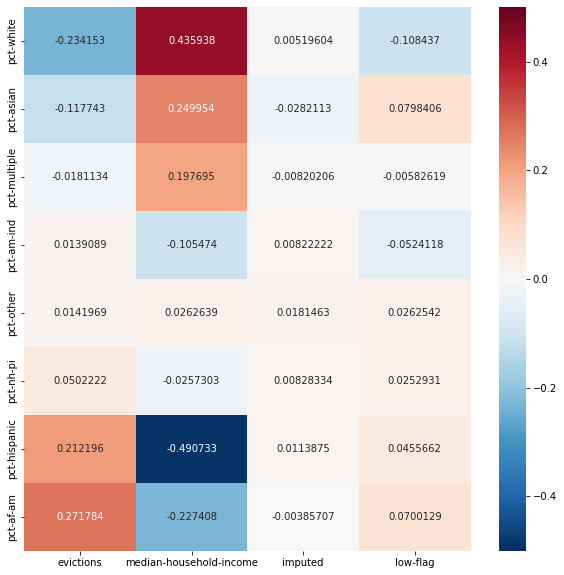

<IPython.core.display.Javascript object>

In [15]:
# Visualize the above correlations.
plt.figure(figsize=FIGSIZE)
sns.heatmap(
    correlation_df.sort_values("evictions"),
    annot=True,
    fmt="g",
    cmap="RdBu_r",
    vmin=-0.5,
    vmax=0.5,
)

 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

We are not going to spend time in this exercise looking at examples of poor visualizations, but this is a good check to do for real projects.

 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?

Mostly not applicable. We have no PII, but we do have some tracts with few observations. We need to be mindful of those and maybe exclude them from visualizations or combine them with neighboring tracts.

 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

Yes, all of our code is contained in this notebook. For real projects, this is an important point to consider in more depth.

## D. Modeling

The non-profit wants their decision-making to be race-blind, so they ask for the population race percentage features to not be included in the modeling.

In [16]:
TARGET_VAR = "evictions"
FEATURE_VARS = [
    "year",
    "population",
    "poverty-rate",
    "median-property-value",
    "renter-occupied-households",
    "pct-renter-occupied",
    "median-gross-rent",
    "median-household-income",
    "rent-burden",
    ## Don't include race features
    #'pct-white' , 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
    #'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other'
    ## Also don't include features directly related to the target variable
    # 'eviction-filings', 'eviction-rate', 'eviction-filing-rate'
]
GROUP_VAR = "GEOID"  # Prevent leakage

<IPython.core.display.Javascript object>

In [17]:
print(f"Original Shape: {df.shape}")
# Drop NAs in target variable
df_modeling = df.dropna(subset=[TARGET_VAR]).copy()
df_modeling.reset_index(inplace=True)
print(f"Shape without NAs: {df_modeling.shape}")

Original Shape: (136958, 27)
Shape without NAs: (115222, 28)


<IPython.core.display.Javascript object>

In [18]:
from sklearn.model_selection import GroupShuffleSplit, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

In [19]:
df_modeling.loc[:, TARGET_VAR].describe()

count    115222.000000
mean         11.417629
std          14.838183
min           0.000000
25%           2.000000
50%           7.000000
75%          15.000000
max         296.000000
Name: evictions, dtype: float64

<IPython.core.display.Javascript object>

In [20]:
# create a train-test split for model evaluation later
split = GroupShuffleSplit(test_size=0.20, n_splits=2, random_state=36).split(
    df_modeling, groups=df_modeling.loc[:, GROUP_VAR]
)

train_inds, test_inds = next(split)

df_train = df_modeling.loc[train_inds, :]
df_test = df_modeling.loc[test_inds, :]

X_train = df_train.loc[:, FEATURE_VARS].values
y_train = df_train.loc[:, TARGET_VAR].values

X_test = df_test.loc[:, FEATURE_VARS].values
y_test = df_test.loc[:, TARGET_VAR].values

<IPython.core.display.Javascript object>

We're going to fit and use a [random forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) model to predict evictions.

In [21]:
%%time
# train the model
model_pipeline = Pipeline([
    ('med_impute', SimpleImputer(strategy='median')),
    ('model', RandomForestRegressor(
        criterion='mse',
        n_estimators=100, 
        max_depth=10,
        random_state=36
    ))
])
model_pipeline.fit(X_train, y_train)

/opt/anaconda3/envs/msc-buckingham-data-ethics/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 31.8 s, sys: 439 ms, total: 32.2 s
Wall time: 33 s


Pipeline(steps=[('med_impute', SimpleImputer(strategy='median')),
                ('model',
                 RandomForestRegressor(criterion='mse', max_depth=10,
                                       random_state=36))])

<IPython.core.display.Javascript object>

In [22]:
# generate predictions and look at key performance metrics
y_pred = model_pipeline.predict(X_test)
print("R2", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 0.4902906447471631
MSE 102.05521224494476
MAE 5.9859944311932445


<IPython.core.display.Javascript object>

 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?

Per the non-profit's request, we did not include any race variables in training our model. We want to figure out whether the model is still making decisions based on race using proxy variables that can indirectly indicate race.

**Any questions before we dive into our first activity?**

***
### <span style="color:green">*Activity*</span>

> Work independently for 20-25 minutes. Start here and stop where "end of activity" is indicated. **We encourage you to collaborate with one another in the Teams channel!**

**<span style="color:green">To what extent are any of the feature variables in our model acting as proxies for race? Take some time to explore the data.</span>**

<span style="color:green">First, let's look for correlations between our feature variables and our race variables.</span>

<AxesSubplot:>

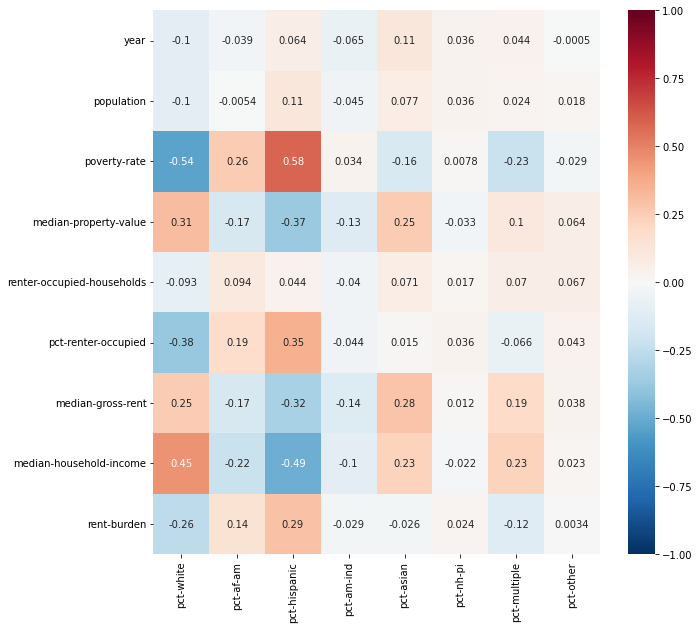

<IPython.core.display.Javascript object>

In [23]:
corr = df_modeling.loc[:, FEATURE_VARS + race_cols].corr().loc[FEATURE_VARS, race_cols]

plt.figure(figsize=FIGSIZE)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap="RdBu_r", annot=True)

**<span style="color:green">Takeaways</span>** 

- <span style="color:green">*Example takeaway:* poverty rate has a strong correlation with multiple race variables. It tends to be higher for tracts with a higher percent hispanic, and also higher but slightly less so for tracts with a higher percent African American. It tends to be lower in neighborhoods that are more white.</span>

- <span style="color:green">... your thoughts here ...</span>

<span style="color:green">We can use the correlation function's documentation to help with interpretation (below). You may want to look online for more details about any concepts in the documentation that you aren't familiar with, like pearson correlation coefficients.</span>

In [24]:
# run this to see documentation of the df.corr function
?df.corr

<IPython.core.display.Javascript object>

<span style="color:green">Your turn to code!</span>

<span style="color:green">We have a lot of different race variables, some of which have fairly low rates in many areas. **What happens if we create an aggregated variable for the percent of all non-white residents (`pct-non-white`)? What do the feature variable correlations look like for `pct-non-white` compared to `pct-white`, and do any patterns become clearer?** *Hint:* You can accomplish most of this by reusing code from above.</span>

<span style="color:green">Remember to document any substantive choices you have to make when you define the `pct-non-white` variable, and who is included.</span>

In [25]:
# create pct-non-white variable
df_modeling["pct-non-white"] = ...  ## YOUR CODE HERE

# plot correlations to feature variables

## YOUR CODE HERE

<IPython.core.display.Javascript object>

**<span style="color:green">Takeaways</span>** 

- <span style="color:green">... your thoughts here ...</span>

<span style="color:green">Another strategy is to fit a model that predicts the percent of a given race based on feature variables. If that model performs well, we know that our model predicting evictions could also make accurate inferences about racial breakdowns within tracts.</span>

<span style="color:green">**Below, train a model that predicts `pct-white` based on the same `FEATURE_VARS` used to train our eviction model earlier. Then assess how well the model performs, and write up a few takeaways about what that means for race proxy variables in our eviction model.** Remember, you can reuse code from earlier steps.</span>

In [ ]:
# create X_train, y_train, X_test, and y_test
# we can use the same split as before

## YOUR CODE HERE

In [ ]:
# train a model to predict pct-white

## YOUR CODE HERE

In [ ]:
# calculate simple performance metrics (R2, MSE, MAE)

## YOUR CODE HERE

In [ ]:
# code for any other exploration of model performance you'd like to do!

**<span style="color:green">Takeaways</span>** 

<span style="color:green">... add your thoughts here ...</span>


<span style="color:green">**End of activity, wait for group to reconvene and discuss**</span>

***

 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

### <span style="color:green">*Discussion*</span>

<span style="color:green">What are some approaches we can use to answer this question? Think about things like:</span> 

- <span style="color:green">How does the format of the data about race impact our strategy?</span> 

- <span style="color:green">What model performance metrics do we want to consider?</span> 

- <span style="color:green">What visuals do we want to produce?</span>

***

### <span style="color:green">*Activity*</span>

> Work independently for 15-20 minutes. Start here and stop where "end of activity" is indicated

<span style="color:green">Calculate the correlation between each of the race variables in the model with error and absolute error. Remember that you can re-use code from previous sections.</span>

In [ ]:
# add columns to df_test for error and absolute error

## YOUR CODE HERE

# calculate correlation

## YOUR CODE HERE

# plot correlation heatmap

## YOUR CODE HERE

**<span style="color:green">Takeaways</span>** 

- <span style="color:green">... add your thoughts here ...</span>

<span style="color:green">Generate at least one other visual that helps to compare error rates between different racial groups. You could also explore another method of determining whether error is dependent on race percentages, such as fitting another model.</span>

In [ ]:
## YOUR CODE HERE

<span style="color:green">**End of activity, wait for group to reconvene and discuss**</span>

***

 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?

In the Random Forest model above, we used `mse` (mean-squared error) as the loss function. Mean-squared error is affected more by outliers than mean-absolute error. We won't go into metric selection in detail in this exercise.

 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

We won't go into explainability in detail in this exercise.

In [ ]:
model_pipeline.named_steps["model"].feature_importances_
feature_importance = pd.DataFrame.from_dict(
    {
        "features": FEATURE_VARS,
        "importance": model_pipeline.named_steps["model"].feature_importances_,
    }
)
print(
    feature_importance.sort_values("importance", ascending=False).reset_index(drop=True)
)

 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

We won't go into communicate bias in detail in this exercise.

## E. Deployment

 - [ ] **E.1 Monitoring and evaluation:** How are we planning to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?

 - [ ] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?

### <span style="color:green">*Discussion*</span>


<span style="color:green">*E.1 and E.2:* Think about how you could monitor/evaluate the model moving forward, and put steps for redress in place.</span>

- <span style="color:green">What are some possible real-world consequences of the model performing poorly / making mistakes? What is the potential harm or inequity from incorrect model estimates?</span>

- <span style="color:green">How might you determine what the performance cutoff is for the model being good enough to use in practice?</span>

- <span style="color:green">What metric could you use for the above? What are some of the pros and cons of different matrics? Think about the consequences of false positives vs. false negatives in practice. Is one less desirable than the other, and how can that be reflected in your metric?</span>

- <span style="color:green">If/when the model is deployed in practice, will there be any human review of the model's decisions? In which cases will there be human review, and how will that be integrated?</span>

 - [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?

We won't go into roll back in detail in this exercise.

 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

We won't go into unintended use in detail in this exercise.

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*